# Exploratory Data Analysis of Boston Uber Data

In [2]:
import numpy as np
import pandas as pd 
import matplotlib 
import time, datetime
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [3]:
df = pd.read_csv("rideshare_kaggle.csv")

In [4]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Here we are droping the columns we don't need currently (after keeping a copy if needed for later analysis)

In [6]:
df_copy = df # copy of original 
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'apparentTemperature', 'short_summary', 'long_summary',
       'precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'windGustTime', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'temperatureLowTime',
       'apparentTemperatureHigh', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureLowTime', 'icon',
       'dewPoint', 'pressure', 'windBearing', 'cloudCover', 'uvIndex',
       'visibility.1', 'ozone', 'sunriseTime', 'sunsetTime', 'moonPhase',
       'precipIntensityMax', 'uvIndexTime', 'temperatureMin',
       'temperatureMinTime', 'temperatureMax', 'temperatureMaxTime',
       'apparentTemperatureMin', 'apparentTemperatureMinTime',
       'apparentTemperat

In [7]:
extra_cols = ["apparentTemperature", "precipIntensity", 
'humidity',
'windSpeed',
'apparentTemperatureHigh',
'dewPoint',
'precipIntensityMax',
'apparentTemperatureMax',
'cloudCover',
'moonPhase',
'windGustTime',
'visibility',
'temperatureHighTime' ,
'apparentTemperatureHighTime',
'apparentTemperatureLow' ,
'apparentTemperatureLowTime',
'temperatureMinTime' ,
'temperatureMaxTime',
'apparentTemperatureMin',
'apparentTemperatureMinTime', 'apparentTemperatureMaxTime',
'windBearing' ,
'sunriseTime',
'uvIndex' ,
'visibility.1', 
'ozone',
'sunsetTime', 'uvIndexTime']
df = df.drop(extra_cols, axis = 1)

In [8]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipProbability', 'windGust',
       'temperatureHigh', 'temperatureLow', 'temperatureLowTime', 'icon',
       'pressure', 'temperatureMin', 'temperatureMax'],
      dtype='object')

In [9]:
df.sample(10)

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,long_summary,precipProbability,windGust,temperatureHigh,temperatureLow,temperatureLowTime,icon,pressure,temperatureMin,temperatureMax
562732,1280e2c3-96cf-443c-8063-72974ad2598c,1.543660e+09,10,1,12,2018-12-01 10:32:56,America/New_York,Back Bay,South Station,Uber,...,Light rain in the morning and overnight.,0.0,4.10,44.80,34.67,1543712400,partly-cloudy-night,1021.70,31.26,44.80
499044,f9c7a1ec-063f-4118-b4d5-27f0b15c1381,1.544712e+09,14,13,12,2018-12-13 14:35:07,America/New_York,North Station,South Station,Uber,...,Partly cloudy throughout the day.,0.0,4.22,33.92,27.05,1544781600,partly-cloudy-day,1033.93,18.05,33.92
218043,3f303143-1d66-4244-ab24-637268cfb55a,1.543876e+09,22,3,12,2018-12-03 22:32:58,America/New_York,Boston University,Financial District,Uber,...,Foggy in the morning.,0.0,10.16,57.27,33.67,1543921200,partly-cloudy-night,1001.06,42.89,57.27
186223,3112bf42-ef86-47b3-b973-3624919b6b32,1.543287e+09,2,27,11,2018-11-27 02:51:22,America/New_York,South Station,Beacon Hill,Uber,...,"Rain until morning, starting again in the eve...",1.0,11.98,47.30,42.10,1543298400,rain,1003.97,40.49,47.30
426980,4cdba48e-4756-4761-a9ba-b4d69aea2654,1.545084e+09,22,17,12,2018-12-17 22:00:09,America/New_York,Beacon Hill,Haymarket Square,Lyft,...,Light rain in the morning.,0.0,9.37,41.35,24.00,1545134400,cloudy,1000.26,34.25,41.35
459676,b23369c7-78ad-4dda-9fb9-61423e222348,1.544678e+09,5,13,12,2018-12-13 05:05:09,America/New_York,Haymarket Square,Financial District,Uber,...,Partly cloudy throughout the day.,0.0,4.21,33.82,27.11,1544781600,clear-night,1027.98,17.98,33.82
160102,6427bbb1-4c44-43b1-a5cb-f0773f80cc95,1.544731e+09,19,13,12,2018-12-13 19:50:12,America/New_York,West End,Haymarket Square,Lyft,...,Partly cloudy throughout the day.,0.0,3.83,33.83,27.27,1544781600,partly-cloudy-day,1033.65,18.29,33.83
179602,036b4444-e657-4fea-90d5-017a2669f559,1.543433e+09,19,28,11,2018-11-28 19:29:08,America/New_York,Financial District,Northeastern University,Uber,...,Mostly cloudy throughout the day.,0.0,14.86,42.72,37.59,1543485600,cloudy,991.85,33.82,42.72
509815,3e6602ba-ccc2-4a69-b33b-d3895a9696f3,1.543409e+09,12,28,11,2018-11-28 12:38:08,America/New_York,South Station,Back Bay,Lyft,...,Mostly cloudy throughout the day.,0.0,6.95,42.61,37.64,1543485600,partly-cloudy-day,991.36,33.83,42.61
521281,fba17a54-3d16-49fb-8586-5e9564366351,1.543460e+09,2,29,11,2018-11-29 02:50:08,America/New_York,Financial District,Haymarket Square,Lyft,...,Mostly cloudy throughout the day.,0.0,12.43,42.70,37.17,1543464000,partly-cloudy-night,997.37,33.60,42.70


In [10]:
df.shape

(693071, 29)

# FInding NULL Values of NAN values if found the n dropped 

In [12]:
print(df.isnull().sum())
print(df.isnull().sum().sum())

id                        0
timestamp                 0
hour                      0
day                       0
month                     0
datetime                  0
timezone                  0
source                    0
destination               0
cab_type                  0
product_id                0
name                      0
price                 55095
distance                  0
surge_multiplier          0
latitude                  0
longitude                 0
temperature               0
short_summary             0
long_summary              0
precipProbability         0
windGust                  0
temperatureHigh           0
temperatureLow            0
temperatureLowTime        0
icon                      0
pressure                  0
temperatureMin            0
temperatureMax            0
dtype: int64
55095


Let’s find out the most common pick-up hours for Uber rides in Boston.

Text(0, 0.5, 'Hours')

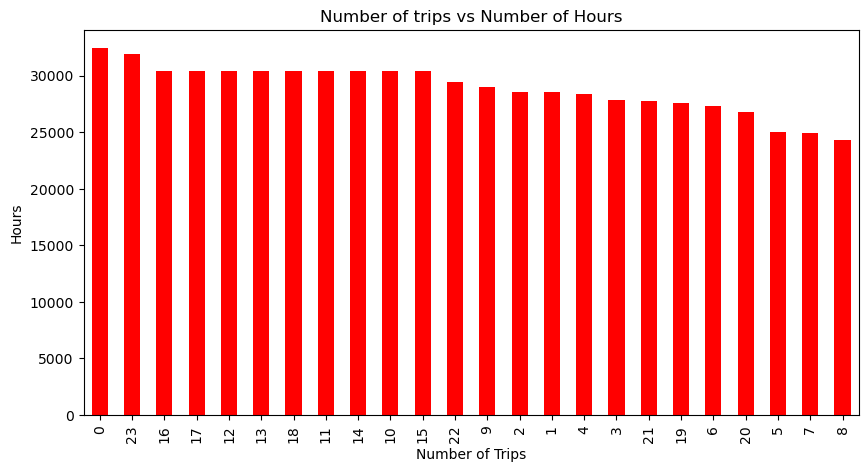

In [14]:
hours = df["hour"].value_counts()
hours.plot(kind= "bar", color= "red", figsize= (10,5))
plt.title("Number of trips vs Number of Hours")
plt.xlabel("Number of Trips")
plt.ylabel("Hours")

Observation 1: 
1. The rides are almost equally frequent at all day hours (and night) but, more rides are ordered toward midnight or during business hours afternoon  

In [16]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipProbability', 'windGust',
       'temperatureHigh', 'temperatureLow', 'temperatureLowTime', 'icon',
       'pressure', 'temperatureMin', 'temperatureMax'],
      dtype='object')

To analyze the day of the week data, we need to generate the names of days from the timestamps.

Here I am creating a pandas Series that contains 1.names of the days of the week and 2.datetime values corrosponding to datetime column

In [19]:
df["datetime"]

0         2018-12-16 09:30:07
1         2018-11-27 02:00:23
2         2018-11-28 01:00:22
3         2018-11-30 04:53:02
4         2018-11-29 03:49:20
                 ...         
693066    2018-12-01 23:53:05
693067    2018-12-01 23:53:05
693068    2018-12-01 23:53:05
693069    2018-12-01 23:53:05
693070    2018-12-01 23:53:05
Name: datetime, Length: 693071, dtype: object

In [20]:
day_week = [calendar.day_name[x.dayofweek] for x in
          pd.to_datetime(df['datetime'], format= "%Y-%m-%d %H:%M:%S")]
day_week = pd.Series(day_week)


In [21]:
print(day_week)

0            Sunday
1           Tuesday
2         Wednesday
3            Friday
4          Thursday
            ...    
693066     Saturday
693067     Saturday
693068     Saturday
693069     Saturday
693070     Saturday
Length: 693071, dtype: object


In [22]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,long_summary,precipProbability,windGust,temperatureHigh,temperatureLow,temperatureLowTime,icon,pressure,temperatureMin,temperatureMax
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,Rain throughout the day.,0.0,9.17,43.68,34.19,1545048000,partly-cloudy-night,1021.98,39.89,43.68
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,"Rain until morning, starting again in the eve...",1.0,11.98,47.30,42.10,1543298400,rain,1003.97,40.49,47.30
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,Light rain in the morning.,0.0,7.33,47.55,33.10,1543402800,clear-night,992.28,35.36,47.55
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,Partly cloudy throughout the day.,0.0,5.28,45.03,28.90,1543579200,clear-night,1013.73,34.67,45.03
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,Mostly cloudy throughout the day.,0.0,9.14,42.18,36.71,1543478400,partly-cloudy-night,998.36,33.10,42.18


Text(0, 0.5, 'Days')

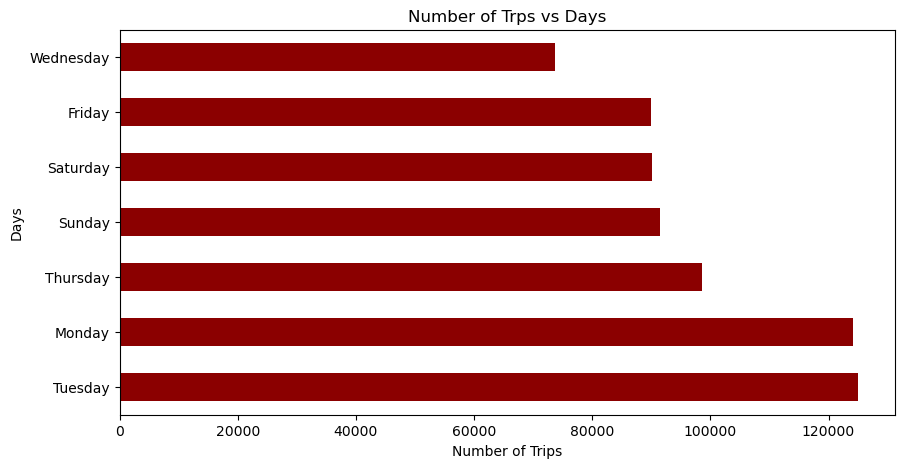

In [23]:
days = day_week.value_counts()
days.plot(kind = "barh", color = "darkred", figsize = (10,5) )
plt.title("Number of Trps vs Days")
plt.xlabel("Number of Trips")
plt.ylabel("Days")

Observation 2
1. From the above chart we can see most amount of trips are taken during Weekdays of Monday and Tuesday. This might indicate active business meetings or late-night outings, as seen in the previous graph.

Text(0, 0.5, 'Months')

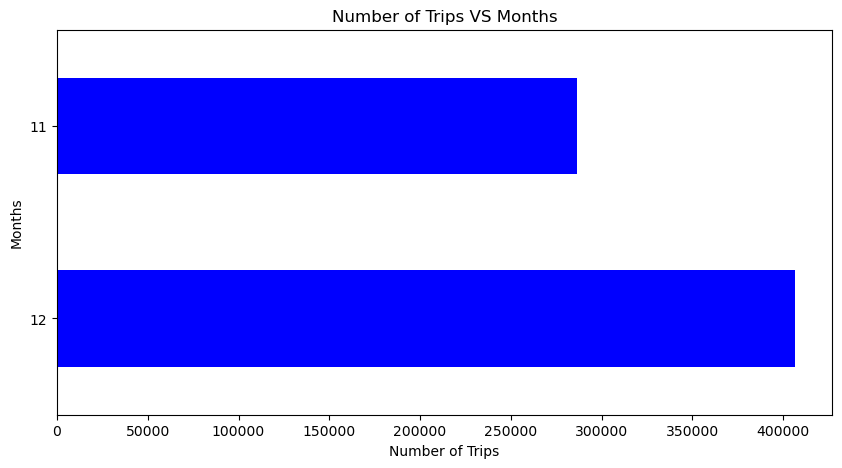

In [25]:
# now let's compare the months as well 
month = df["month"].value_counts()
month.plot(kind= "barh", color= "blue", figsize = (10,5))
plt.title("Number of Trips VS Months")
plt.xlabel("Number of Trips")
plt.ylabel("Months")

This data only contains details of rides in Nov and December 2018. We can see Most amount of cabs were booked in month of December 

# Now let's find out Which day of December most amount of Cabs were booked?

Text(0, 0.5, 'Number of Rides')

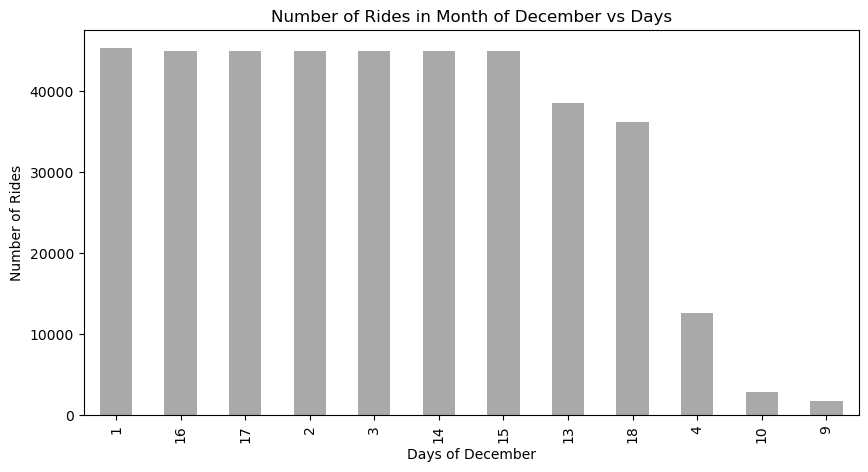

In [28]:
month = df["day"][df["month"] == 12].value_counts()
month.plot(kind= "bar", color= "darkgray", figsize = (10,5))
plt.title("Number of Rides in Month of December vs Days")
plt.xlabel("Days of December")
plt.ylabel("Number of Rides")

In [29]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipProbability', 'windGust',
       'temperatureHigh', 'temperatureLow', 'temperatureLowTime', 'icon',
       'pressure', 'temperatureMin', 'temperatureMax'],
      dtype='object')

# Now let's find out most busy pick-up and drop-off points in Boston

Text(0, 0.5, 'Pickup Spots')

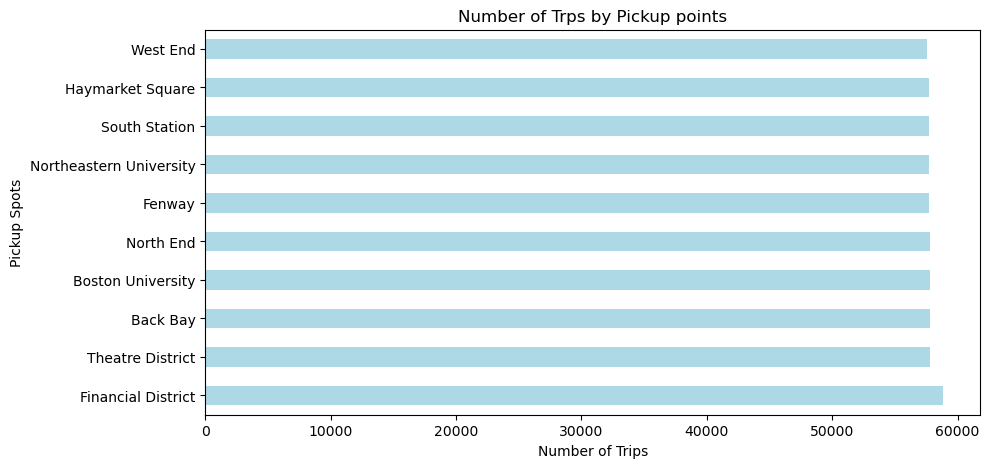

In [31]:
#most busy pick-up stops first
pic_spot = df["source"].value_counts().nlargest(10)
pic_spot.plot(kind= "barh", color= "lightblue", figsize=(10,5))
plt.title("Number of Trps by Pickup points")
plt.xlabel("Number of Trips")
plt.ylabel("Pickup Spots")

Text(0, 0.5, 'Drop points')

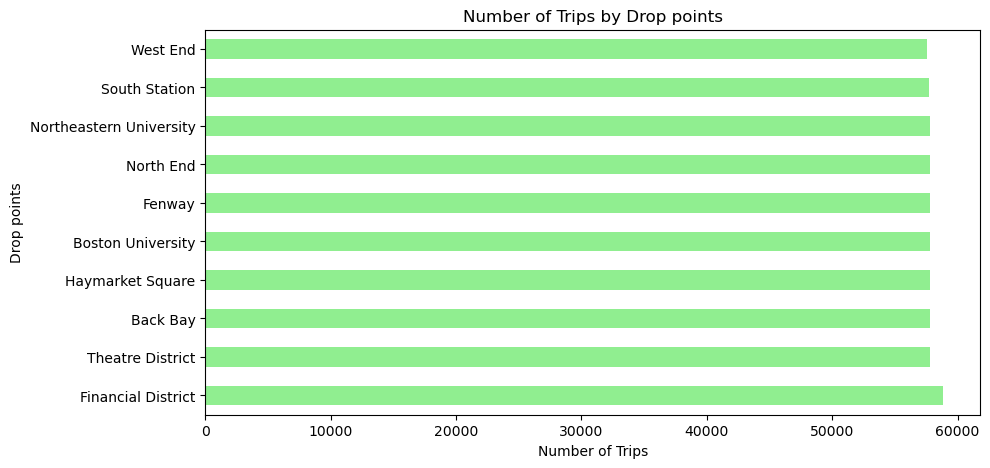

In [32]:
# most busy Drop-off Spots
drop_spot = df[ 'destination' ].value_counts().nlargest(10)
drop_spot.plot(kind='barh', color= 'lightgreen', figsize=(10, 5))
plt.title( 'Number of Trips by Drop points')
plt.xlabel('Number of Trips')
plt.ylabel('Drop points' )


In [33]:
df.columns

Index(['id', 'timestamp', 'hour', 'day', 'month', 'datetime', 'timezone',
       'source', 'destination', 'cab_type', 'product_id', 'name', 'price',
       'distance', 'surge_multiplier', 'latitude', 'longitude', 'temperature',
       'short_summary', 'long_summary', 'precipProbability', 'windGust',
       'temperatureHigh', 'temperatureLow', 'temperatureLowTime', 'icon',
       'pressure', 'temperatureMin', 'temperatureMax'],
      dtype='object')

Observation 3
1. There were no especially busy pickup or drop-off points in Boston, and most popular locations received a similar number of pick-up and drop-off requests. The Financial District (the business hub of Boston) received slightly more traffic than the rest – confirming the afternoon business meetings on Mondays and Tuesdays.

# let's dug deeper by comparing point to point Commute

Text(0, 0.5, 'point - point')

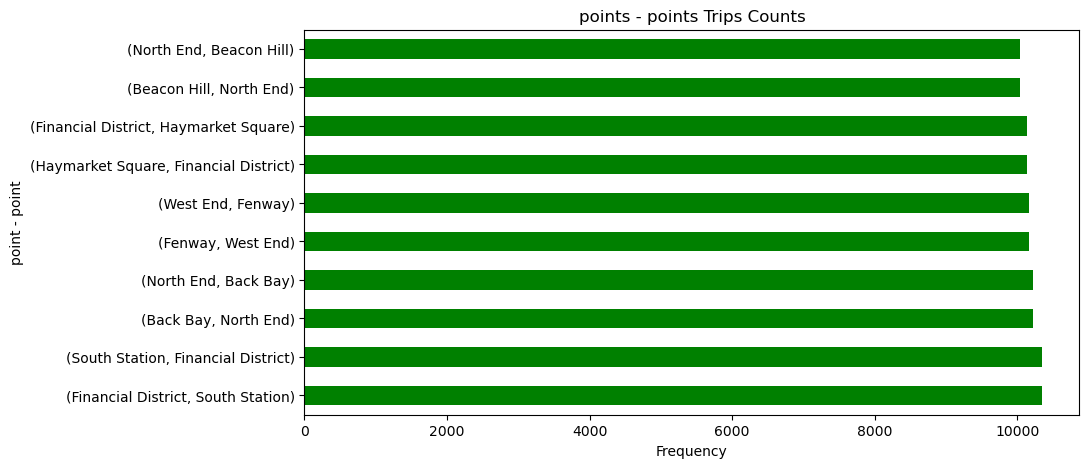

In [36]:
p_p = df[["source", "destination"] ].value_counts().nlargest(10)
p_p.plot(kind= "barh", color= "green", figsize= (10,5))
plt.title('points - points Trips Counts')
plt.xlabel("Frequency")
plt.ylabel("point - point")

Observation 4
1. looking at the whole trip data, we find that most trips from and to the Financial District have the South Station on the other end. This means that people use Uber to reach the Metro more frequently than to reach their desired destination directly.

# FInd out What cabs People prefer in Boston

Text(0, 0.5, 'Cabs Name')

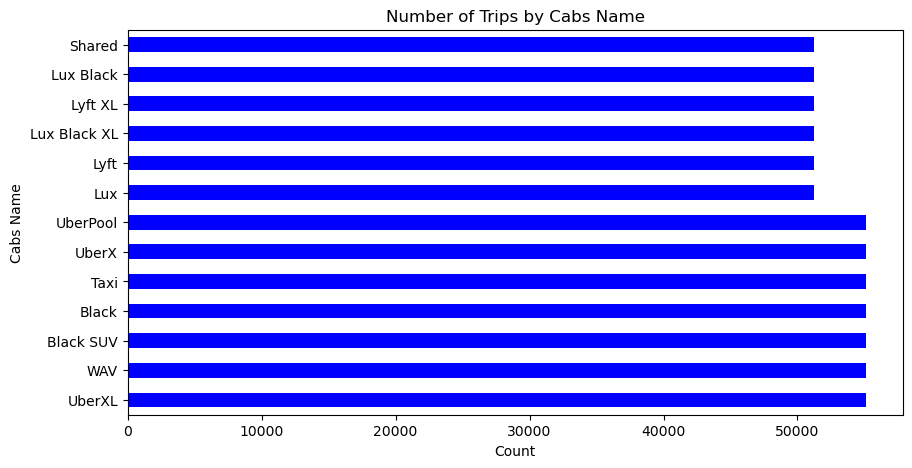

In [39]:
cabs = df["name"].value_counts()
cabs.plot(kind= "barh", color= "blue", figsize=(10,5))
plt.title("Number of Trips by Cabs Name")
plt.xlabel('Count')
plt.ylabel('Cabs Name' )

Observation 4
1. Being the more affordable option, it is obvious why UberPool is more popular.

In [41]:
df.groupby(by=["destination","source"]).agg({'latitude':'mean','longitude':'mean'})

latitude  longitude
destination source                                       
Back Bay    Boston University        42.336904 -71.066127
            Fenway                   42.337840 -71.065812
            Haymarket Square         42.337070 -71.065139
            North End                42.338142 -71.066312
            Northeastern University  42.336810 -71.065419
...                                        ...        ...
West End    Fenway                   42.338440 -71.066429
            Haymarket Square         42.339464 -71.066280
            North End                42.337216 -71.066243
            Northeastern University  42.340173 -71.066657
            South Station            42.339025 -71.066998

[72 rows x 2 columns]

Here i make a geospatial map to visualize our data which the departure point of the trips is haymarket square. I plot them using clusters instead of marker. The map rendered by folium is interactive, we can slide, drag, and zoom in/out.¶
import geopandas as gpd

In [93]:
import geopandas as gpd
import folium
from folium.plugins import FastMarkerCluster
df1 = df[df['source']=='Haymarket Square']
my_map = folium.Map(location=[df1["latitude"].mean(), df1["longitude"].mean()],zoom_start = 10)
my_map.add_child(FastMarkerCluster(df1[['latitude', 'longitude']].values.tolist(),color='green'))
my_map

e can see that trips which their sources are Haymarket Square have two groups or clusters of destination that contain many places (we can see them if we zoom the map). Many of them are in boston area as we can see that there are 50249 data in that cluster.

# Price Analysis

We can see average or mean of our price data in every route (source-destination) through table below

In [74]:
pd.set_option('display.max_rows', 72)
df.groupby(by = ["source","destination"]).price.agg(["mean"])

mean
source                  destination                       
Back Bay                Boston University        14.039392
                        Fenway                   13.658752
                        Haymarket Square         17.987384
                        North End                19.473019
                        Northeastern University  13.151040
                        South Station            17.700711
Beacon Hill             Boston University        16.376737
                        Fenway                   16.158840
                        Haymarket Square         13.799137
                        North End                15.270942
                        Northeastern University  16.471792
                        South Station            15.950661
Boston University       Back Bay                 13.992801
                        Beacon Hill              17.315535
                        Financial District       24.146085
                        North Station            20.185338
                        Theatre District         18.689557
                        West End                 18.611766
Fenway                  Back Bay                 13.802155
                        Beacon Hill              16.796674
                        Financial District       23.438818
                        North Station            19.701839
                        Theatre District         18.232722
                        West End                 18.161806
Financial District      Boston University        25.498434
                        Fenway                   23.404850
                        Haymarket Square         13.188209
                        North End                13.179635
                        Northeastern University  21.918584
                        South Station            12.349066
Haymarket Square        Back Bay                 16.860489
                        Beacon Hill              13.338559
                        Financial District       12.731618
                        North Station            12.332545
                        Theatre District         13.677272
                        West End                 12.529855
North End               Back Bay                 19.550935
                        Beacon Hill              15.982630
                        Financial District       13.417597
                        North Station            12.824092
                        Theatre District         15.169406
                        West End                 13.494873
North Station           Boston University        18.931558
                        Fenway                   18.547603
                        Haymarket Square         12.571791
                        North End                13.106641
                        Northeastern University  19.537848
                        South Station            15.374198
Northeastern University Back Bay                 13.698923
                        Beacon Hill              16.842433
                        Financial District       22.582094
                        North Station            19.910939
                        Theatre District         16.144805
                        West End                 18.204155
South Station           Back Bay                 19.103822
                        Beacon Hill              17.276304
                        Financial District       12.436910
                        North Station            15.746736
                        Theatre District         13.952579
                        West End                 15.881172
Theatre District        Boston University        20.360662
                        Fenway                   19.069278
                        Haymarket Square         15.204973
                        North End                15.159646
                        Northeastern University  16.910751
                        South Station            12.888926
West End                Boston University 


And we can see our maximum price data

In [80]:
print("Maximum price in our data", df.price.max())
df[df["price"]==df.price.max()]

Maximum price in our data 97.5


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,long_summary,precipProbability,windGust,temperatureHigh,temperatureLow,temperatureLowTime,icon,pressure,temperatureMin,temperatureMax
597071,ba1593a1-e4fd-4c7a-a011-e2d4fccbf081,1.543714e+09,1,2,12,2018-12-02 01:28:02,America/New_York,Financial District,Fenway,Lyft,...,Light rain in the morning and overnight.,0.0,2.37,44.65,34.88,1543712400,clear-night,1023.52,31.57,44.65


In [84]:
df[df["price"]==df.price.max()][["latitude","longitude"]]

,latitude,longitude
597071,42.3503,-71.081


We can plot the map of both places using folium to see how far they are from each other


In [100]:
map1 = folium.Map(location=(42.3503,-71.081),zoom_start = 10)
folium.Marker(location=(42.3503,-71.081)).add_to(map1) # Fenway
folium.Marker(location=(42.3378,-71.066)).add_to(map1) # Financial District
display(map1)

Apparently the 'Financial District - Fenway' route (by lyft) costs 97.5 dollars, which is our maximum price data. But from the map above, the distance between both places is not too far (they are both in boston), so it could be outlier since we don't have information about trip duration or transit. We should check another data with the same route¶

In [103]:
df_group = df.groupby(by=["source","destination"]).price.agg(["mean"]).reset_index()
df_group[(df_group['source']=='Financial District')& (df_group['destination']=='Fenway')]

,source,destination,mean
25,Financial District,Fenway,23.40485


The mean of the price data of that route is 23.4 dollars, which is far from our maximum price data (97.5 dollars). Then it is possible an outlier. We can drop it

In [106]:
df = df.loc[df['price']!=df.price.max()]

In [108]:
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,long_summary,precipProbability,windGust,temperatureHigh,temperatureLow,temperatureLowTime,icon,pressure,temperatureMin,temperatureMax
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,Rain throughout the day.,0.0,9.17,43.68,34.19,1545048000,partly-cloudy-night,1021.98,39.89,43.68
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,"Rain until morning, starting again in the eve...",1.0,11.98,47.30,42.10,1543298400,rain,1003.97,40.49,47.30
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,Light rain in the morning.,0.0,7.33,47.55,33.10,1543402800,clear-night,992.28,35.36,47.55
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,Partly cloudy throughout the day.,0.0,5.28,45.03,28.90,1543579200,clear-night,1013.73,34.67,45.03
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,Mostly cloudy throughout the day.,0.0,9.14,42.18,36.71,1543478400,partly-cloudy-night,998.36,33.10,42.18


In [163]:
new_df.shape

(637976, 46)

In [165]:
df_copy.isnull().sum().sum()

55095

In [166]:
new_df = df_copy.dropna(axis=0)

In [168]:
new_df.shape

(637976, 57)

In [171]:
new_df.isnull().sum().sum()

0

In [172]:
df_new = new_df.drop(['id','timestamp','datetime','long_summary','apparentTemperatureHighTime','apparentTemperatureLowTime',
                  'apparentTemperatureLowTime','windGustTime','sunriseTime','sunsetTime','uvIndexTime','temperatureMinTime',
                 'temperatureMaxTime','apparentTemperatureMinTime','temperatureLowTime','apparentTemperatureMaxTime'],axis=1)

In [175]:
df_new.shape

(637976, 42)

In [177]:
df_new.columns

Index(['hour', 'day', 'month', 'timezone', 'source', 'destination', 'cab_type',
       'product_id', 'name', 'price', 'distance', 'surge_multiplier',
       'latitude', 'longitude', 'temperature', 'apparentTemperature',
       'short_summary', 'precipIntensity', 'precipProbability', 'humidity',
       'windSpeed', 'windGust', 'visibility', 'temperatureHigh',
       'temperatureHighTime', 'temperatureLow', 'apparentTemperatureHigh',
       'apparentTemperatureLow', 'icon', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'visibility.1', 'ozone', 'moonPhase',
       'precipIntensityMax', 'temperatureMin', 'temperatureMax',
       'apparentTemperatureMin', 'apparentTemperatureMax'],
      dtype='object')

Our goal is to make linear regression model. First we check correlation between our features and target feature (price)


First, i want to check the correlation of our temperature related features with our target feature (Price)

In [181]:
temp_cols= ['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax','price']

In [183]:
temp_cols

['temperature',
 'apparentTemperature',
 'temperatureHigh',
 'temperatureLow',
 'apparentTemperatureHigh',
 'apparentTemperatureLow',
 'temperatureMin',
 'temperatureHighTime',
 'temperatureMax',
 'apparentTemperatureMin',
 'apparentTemperatureMax',
 'price']

In [185]:
df_temp = new_df[temp_cols]
df_temp.head()

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0


In [187]:
df_temp

,temperature,apparentTemperature,temperatureHigh,temperatureLow,apparentTemperatureHigh,apparentTemperatureLow,temperatureMin,temperatureHighTime,temperatureMax,apparentTemperatureMin,apparentTemperatureMax,price
0,42.34,37.12,43.68,34.19,37.95,27.39,39.89,1544968800,43.68,33.73,38.07,5.0
1,43.58,37.35,47.30,42.10,43.92,36.20,40.49,1543251600,47.30,36.20,43.92,11.0
2,38.33,32.93,47.55,33.10,44.12,29.11,35.36,1543320000,47.55,31.04,44.12,7.0
3,34.38,29.63,45.03,28.90,38.53,26.20,34.67,1543510800,45.03,30.30,38.53,26.0
4,37.44,30.88,42.18,36.71,35.75,30.29,33.10,1543420800,42.18,29.11,35.75,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...
693065,37.05,37.05,44.76,34.83,44.09,35.48,31.42,1543690800,44.76,27.77,44.09,9.5
693066,37.05,37.05,44.76,34.83,44.09,35.48,31.42,1543690800,44.76,27.77,44.09,13.0
693067,37.05,37.05,44.76,34.83,44.09,35.48,31.42,1543690800,44.76,27.77,44.09,9.5
693069,37.05,37.05,44.76,34.83,44.09,35.48,31.42,1543690800,44.76,27.77,44.09,27.0


<Axes: >

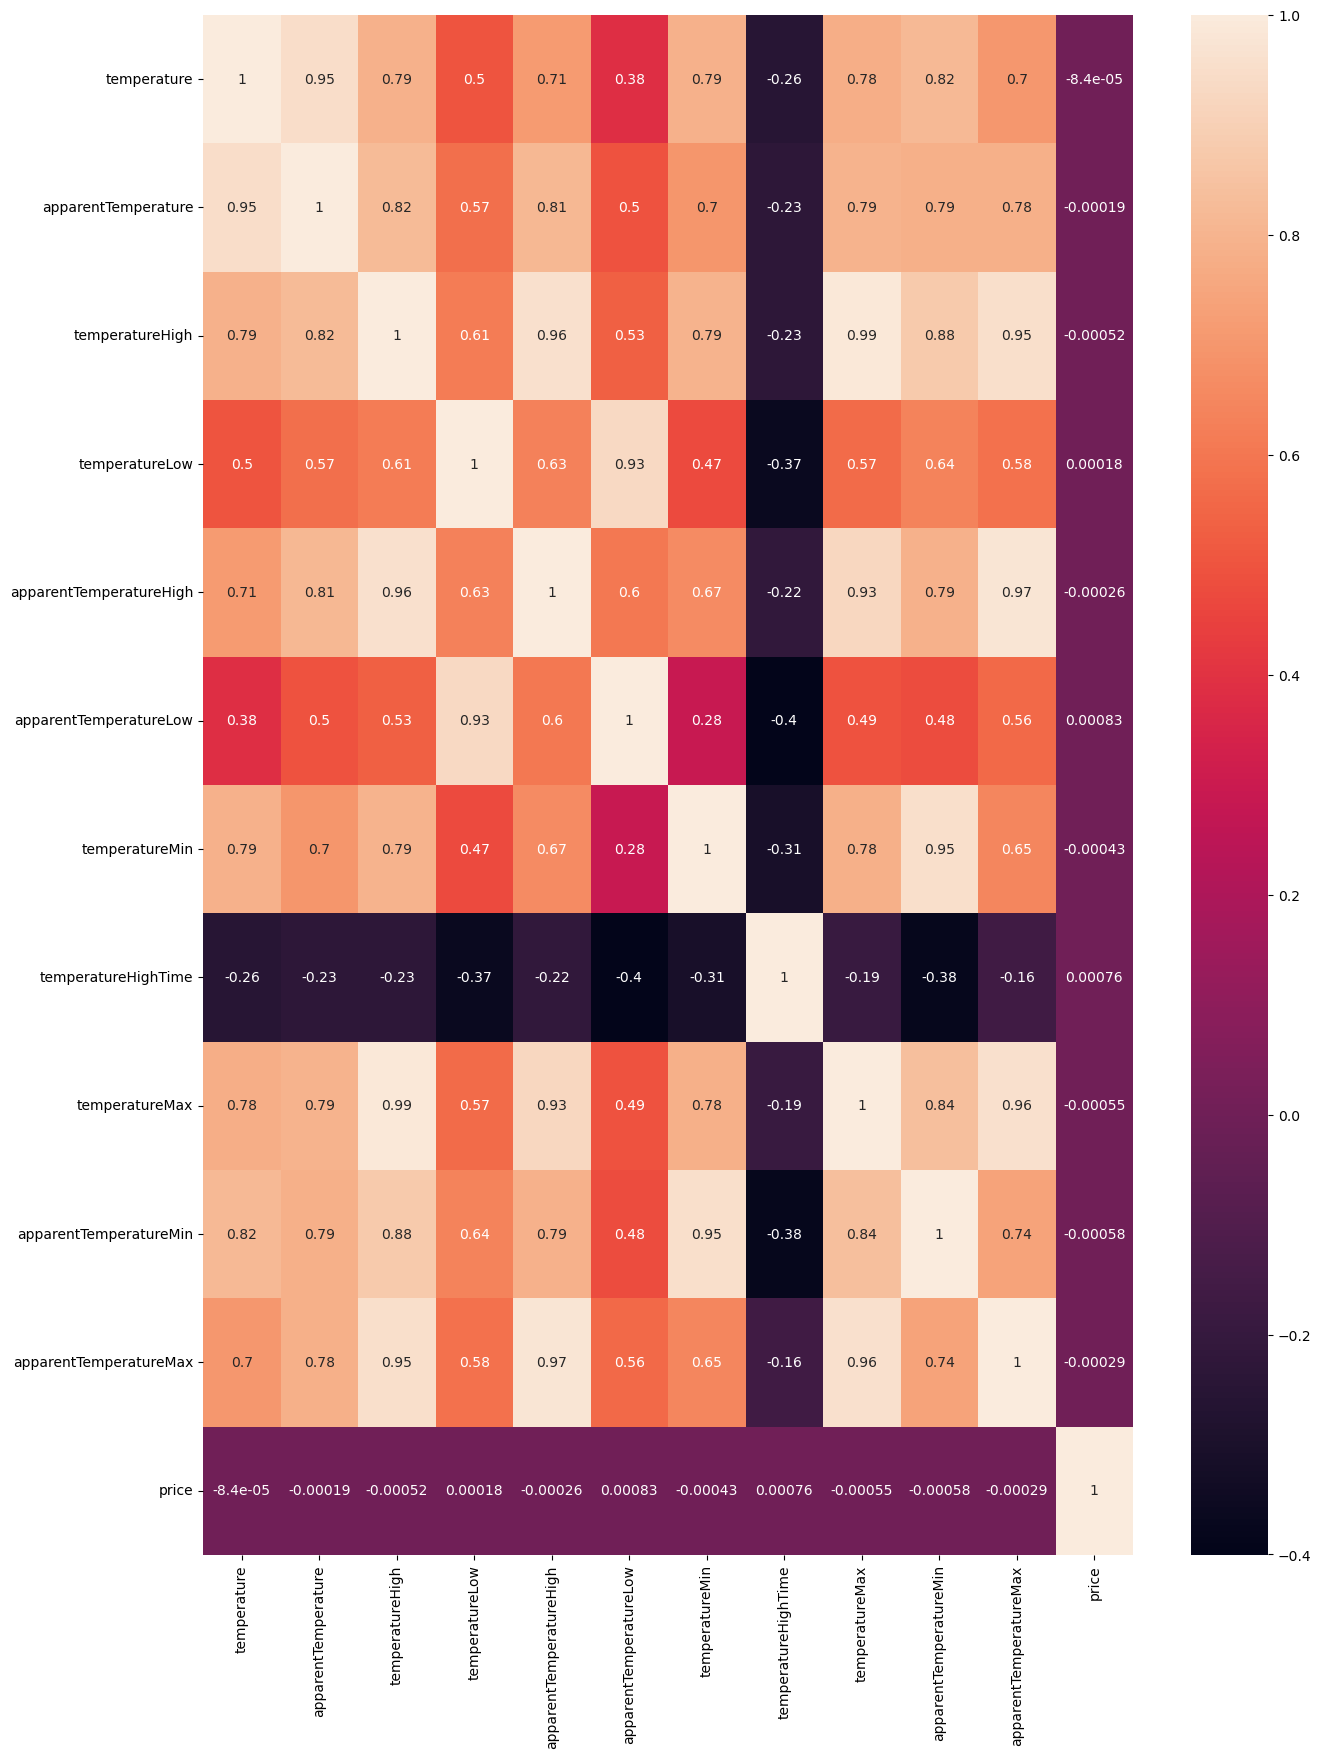

In [189]:
plt.figure(figsize=(15,20))
sns.heatmap(df_temp.corr(),annot=True)

We see that all temperature related features have weak correlation with our target feature which is price


Removing all of them will not make any impact to our regression model

In [191]:
df_new = df_new.drop(['temperature','apparentTemperature','temperatureHigh','temperatureLow','apparentTemperatureHigh',
                'apparentTemperatureLow','temperatureMin','temperatureHighTime','temperatureMax','apparentTemperatureMin','apparentTemperatureMax'],axis=1)
df_new.shape

(637976, 31)

Second, i want to check the correlation of our cilmate related features with our target feature (Price)

In [194]:
climate_column = ['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax','price']
df_clim = df_new[climate_column]
df_clim.head() 

,precipIntensity,precipProbability,humidity,windSpeed,windGust,visibility,dewPoint,pressure,windBearing,cloudCover,uvIndex,ozone,moonPhase,precipIntensityMax,price
0,0.0000,0.0,0.68,8.66,9.17,10.000,32.70,1021.98,57,0.72,0,303.8,0.30,0.1276,5.0
1,0.1299,1.0,0.94,11.98,11.98,4.786,41.83,1003.97,90,1.00,0,291.1,0.64,0.1300,11.0
2,0.0000,0.0,0.75,7.33,7.33,10.000,31.10,992.28,240,0.03,0,315.7,0.68,0.1064,7.0
3,0.0000,0.0,0.73,5.28,5.28,10.000,26.64,1013.73,310,0.00,0,291.1,0.75,0.0000,26.0
4,0.0000,0.0,0.70,9.14,9.14,10.000,28.61,998.36,303,0.44,0,347.7,0.72,0.0001,9.0


<Axes: >

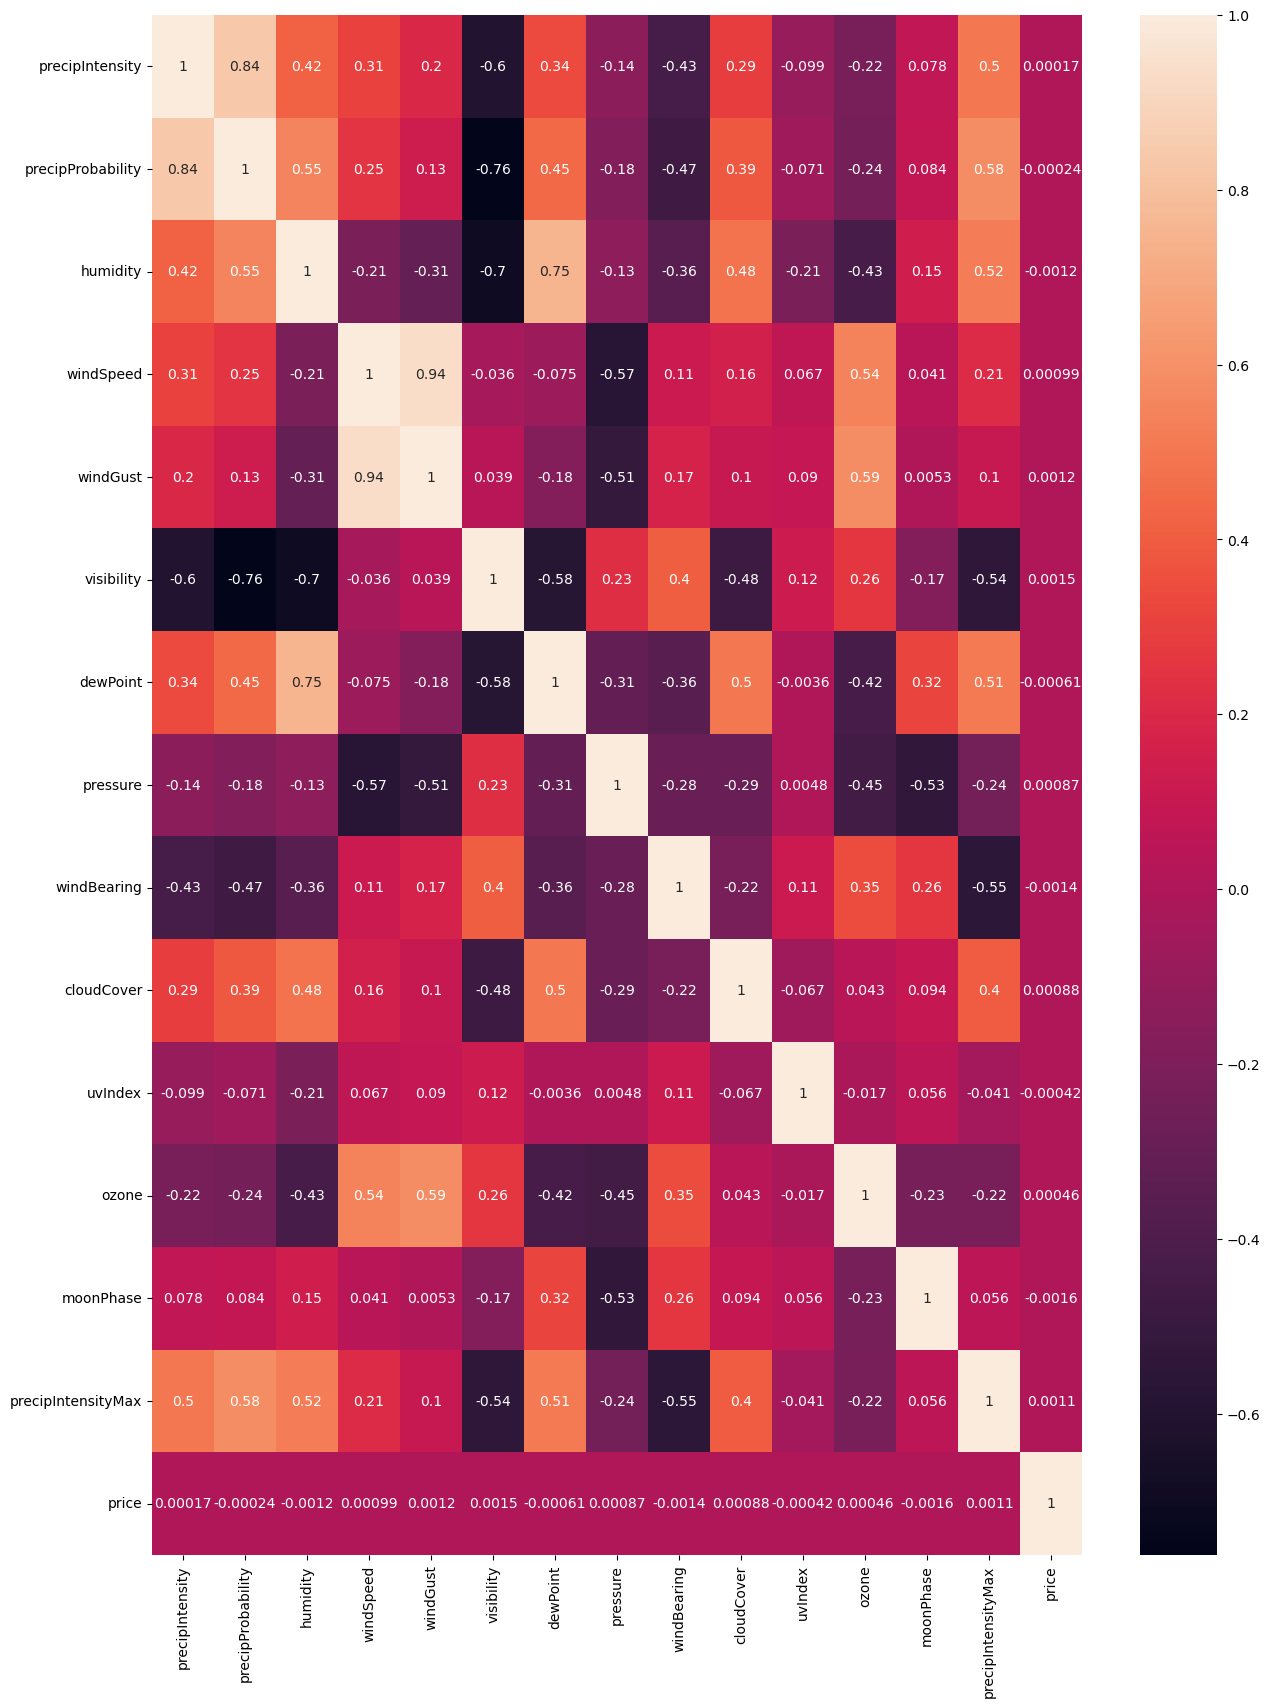

In [196]:
plt.figure(figsize=(15,20))
sns.heatmap(df_clim.corr(),annot=True)

Apparently all climate related features also have weak correlation with our target feature which is price
Once again, 

removing all of them will not make any impact to our regression model

In [201]:
df_new = df_new.drop(['precipIntensity', 'precipProbability', 'humidity', 'windSpeed',
       'windGust', 'visibility', 'dewPoint', 'pressure', 'windBearing',
       'cloudCover', 'uvIndex', 'ozone', 'moonPhase',
       'precipIntensityMax'],axis=1)
df_new.shape

(637976, 17)